# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import json
import re

In [2]:
# Open the csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url)

with open('image_predictions.tsv' , 'wb') as f:
    f.write(image_request.content)


In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#df_tweet_json = pd.read_json('tweet_json.txt', lines=True)
#df_tweet_json.head()
import tweepy

consumer_key = 'aMYul4dxQ2EqdHms1GpM09AHs'
consumer_secret = 'd06SnhfYE0wLVivzLQYHMuKS6gHakyRAMfBLFU3GfZ5dXxDjHz'
access_token = '948740324821671936-svT2IMPVtsMSRgo1cR2FofR9Nbi1H8q'
access_secret = 'SyvAI4E0G9ZAjLx6XCIS1N5gAByFPD6xZuA3fr3FkB9Zn' 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
with open('tweet_json.txt', 'a', encoding='utf8')as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id)
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [7]:
# twitter_data = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

# with open('tweet_json.txt') as f:
#     for line in f:
#         data = json.loads(line)
#         tweet_id = data['id_str'],
#         retweet_count = data['retweet_count'],
#         favorite_count = data['favorite_count']
#         twitter_data = twitter_data.append(pd.DataFrame([[tweet_id,retweet_count,favorite_count]], 
#                                               columns=['tweet_id','retweet_count','favorite_count']))
# twitter_data = twitter_data.reset_index(drop=True)

In [8]:
twitter_list = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        twitter_list.append({'tweet_id' :data['id_str'],
                        'retweet_count' :data['retweet_count'],
                        'favorite_count' :data['favorite_count']})

In [9]:
twitter_data = pd.DataFrame(twitter_list, columns=['tweet_id','retweet_count','favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.duplicated().sum()

0

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
39,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,None,None,None,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
277,840370681858686976,NaN,NaN,2017-03-11 01:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You have been visited by the magical sugar jar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681...,13,10,None,None,None,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None


In [18]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Daisy         7
Toby          7
Buddy         7
Bailey        7
Jax           6
Koda          6
Rusty         6
Oscar         6
Scout         6
Leo           6
Jack          6
Stanley       6
Bella         6
Milo          6
Dave          6
very          5
           ... 
Brudge        1
Jiminus       1
Orion         1
Timmy         1
Willem        1
Bobby         1
Swagger       1
Reptar        1
Bradley       1
Kuyu          1
Kingsley      1
Mojo          1
Ulysses       1
Rambo         1
Hector        1
Rose          1
Ralphé        1
Walker        1
Fiji          1
Harry         1
Brian         1
Tommy         1
Crawford      1
Ralphus       1
Durg          1
Emanuel       1
Rudy          1
Blanket       1
Alf           1
Rumble        1
Name: name, Length: 957,

In [19]:
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [20]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Tidiness Issues
##### `Twitter Archive Table`
1. doggo, floofer, pupper and puppo columns should be merged into one column named "dog_stage"


##### `Image Prediction Table`
1. Image predictions table should be added to Twitter Archive Table

##### `Twitter Data Table`
1.  Twitter Data Table columns(retweet_count, favorite_count, followers_count) should be added to Twitter Archive Table.


### Quality issues
##### `Twitter Archive Table`
1. There are retweet rating data in the dataset

2. There are columns not essential for this analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
                                       
3. Incorrect datatypes: tweet_id, timestamp, rating_denominator, rating_numerator, source 

4. Incorrect data value in name(ex.a,an is not a dog name)

5. Incorrect data value for column numerators(missing decimals)

6. Source column is in HTML-formatted string, not a normal string

7. Text column includes texts and a link

8. Some data has more than one dog_stage and missing data in dog_stage

##### `Image Prediction Table`
1. Incorrect datatype for tweet_id
2. Missing images(only 2075 images out of 2356)


##### `Twitter Data Table`
1. Incorrect datatype for tweet_id
2. Missing tweets data(only 2354 out of 2356)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
image_clean = image_predictions.copy()
archive_clean = twitter_archive.copy()
twitterdata_clean = twitter_data.copy()

### Tidiness Issues
#### `Image Prediction Table`

#1: Image predictions table and Twitter Data should be added to Twitter Archive Table

#### Define
- Merge the three tables

#### Code

In [22]:
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [23]:
df_Twitter = pd.concat([archive_clean, twitterdata_clean, image_clean], join='outer', axis=1)
                       

#### Test

In [24]:
df_Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      23

#2: doggo, floofer, pupper and puppo columns should be merged into one column named "dog_stage"

#### Define
- Extract data in columns 'doggo', 'floofer', 'pupper', 'puppo' into a new column called 'dog_stage' 
- Replace data value "None" in columns 'doggo', 'floofer', 'pupper', 'puppo' to empty string
- Add all values in column 'doggo', 'floofer', 'pupper', 'puppo' together and add into column 'dog_stage'
- Organize those data have two dag stages

#### Code

In [25]:
df_Twitter['dog_stage'] = df_Twitter['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)


In [43]:
# # df_Twitter.fillna({'doggo':''}, inplace=True)
# # df_Twitter.fillna({'floofer':''}, inplace=True)
# # df_Twitter.fillna({'pupper':''}, inplace=True)
# # df_Twitter.fillna({'puppo':''}, inplace=True)

In [26]:
df_Twitter['dog_stage'] = df_Twitter.doggo + df_Twitter.floofer + df_Twitter.pupper + df_Twitter.puppo


#### Test

In [27]:
df_Twitter.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Quality Issue
#### `Twitter Archive Table`

#1: There are retweet rating data in the dataset

#### Define
- Delete retweet data

#### Code

In [28]:
df_Twitter = df_Twitter[pd.isnull(df_Twitter['retweeted_status_id'])]


#### Test

In [29]:
df_Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
tweet_id                      2173 non

#2:  There are columns not essential for this analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 'doggo', 'floofer', 'pupper', 'puppo'. Also, duplicated columns, and null data rows.

#### Define: 
- Drop columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,'doggo', 'floofer', 'pupper', 'puppo'
- Drop duplicated columns
- Drop null data rows

#### Code

In [30]:
df_Twitter = df_Twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls','doggo', 'floofer', 'pupper', 'puppo'], axis=1)
                                    

In [31]:
df_Twitter = df_Twitter.loc[:,~df_Twitter.columns.duplicated()]

In [32]:
df_Twitter.dropna(axis=0, inplace=True)

#### Test

In [33]:
df_Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
retweet_count         1896 non-null float64
favorite_count        1896 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
dog_stage             1896 non

#3: Incorrect datatypes: tweet_id, timestamp, rating_denominator, rating_numerator, source 

#### Define
- Convert tweet_id from int to 'string' in archive_clean table
- Convert timestamp from string to 'datetime' in archive_clean table
- Convert rating_denominator and rating_numerator from int to 'float' in archive_clean table
- Convert Source from string to 'catergory' in archive_clean table

#### Code

In [34]:
df_Twitter.tweet_id = df_Twitter.tweet_id.astype(str)
df_Twitter.timestamp = pd.to_datetime(df_Twitter.timestamp)
df_Twitter.source = df_Twitter.source.astype("category")

#### Test

In [35]:
df_Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id              1896 non-null object
timestamp             1896 non-null datetime64[ns]
source                1896 non-null category
text                  1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
retweet_count         1896 non-null float64
favorite_count        1896 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
dog_stage          

#4: Incorrect data value in name(ex.a,an is not a dog name)

#### Define
- Replace those incorrrect names to None

#### Code

In [36]:
df_Twitter.name = df_Twitter.name.replace('^[a-z]+^', 'None')
df_Twitter.name = df_Twitter.name.replace('a', 'None')

#### Test

In [37]:
df_Twitter['name'].value_counts()

None        614
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Lola          8
Penny         8
Sadie         8
Tucker        8
Toby          7
Winston       7
Bella         6
Bailey        6
Jax           6
Stanley       6
Bo            6
Daisy         6
Oscar         6
Leo           5
Bentley       5
Milo          5
Louis         5
the           5
Koda          5
Buddy         5
Archie        4
Brody         4
Reggie        4
Cassie        4
Finn          4
           ... 
Gidget        1
Donny         1
Banjo         1
Kody          1
Eazy          1
Staniel       1
Pepper        1
Bilbo         1
Lenox         1
Buddah        1
Tove          1
Blu           1
Meatball      1
Kellogg       1
Bowie         1
Maude         1
Sprout        1
such          1
Leonidas      1
Tater         1
Fillup        1
Hermione      1
Dwight        1
Obi           1
Mauve         1
Hurley        1
my            1
Ozzie         1
Nugget        1
Rumble        1
Name: name, Length: 855,

#5: Incorrect data value for numerators(missing decimals)

#### Define
- Extract ratings from text column to a new dataframe "ratings"
- Add the "ratings" into "archive_clean" 
- Drop 'rating_numerator' and 'rating_denominator in archive_clean table

#### Code

In [38]:
ratings = df_Twitter.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.columns = ['rating_numerator_new','rating_denominator_new']
ratings.head()

,rating_numerator_new,rating_denominator_new
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [39]:
df_Twitter['rating_numerator_new'] = ratings['rating_numerator_new']
df_Twitter['rating_denominator_new'] = ratings['rating_denominator_new']

In [40]:
df_Twitter = df_Twitter.drop(['rating_numerator','rating_denominator'], axis=1)

#### Test

In [41]:
df_Twitter.sample(5)

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_numerator_new,rating_denominator_new
990,748705597323898880,2016-07-01 02:31:39,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,None,1504.0,4659.0,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1.0,agama,...,False,Gila_monster,0.126978,False,lumbermill,0.050400,False,,13,10
2058,671347597085433856,2015-11-30 15:18:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She was not fully prepared for t...,Lola,378.0,1193.0,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1.0,golden_retriever,...,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,,9,10
102,872620804844003328,2017-06-08 01:06:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,Monkey,9429.0,41606.0,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1.0,flat-coated_retriever,...,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True,,13,10
418,822462944365645825,2017-01-20 15:17:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,Gabe,11421.0,38832.0,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1.0,toy_poodle,...,True,miniature_poodle,0.151936,True,Maltese_dog,0.045531,True,pupper,14,10
1164,723179728551723008,2016-04-21 16:00:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Jangle. She's addicted to broccoli. It...,Jangle,1831.0,5393.0,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1.0,Staffordshire_bullterrier,...,True,French_bulldog,0.351104,True,doormat,0.028075,False,,8,10


#6: Source column is in HTML-formatted string, not a normal string

#### Define
- Extract 'Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', and 'TweetDeck' from source column

#### Code

In [42]:
df_Twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1783
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       12
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [43]:
# def remove_url(link):
#     result = re.sub('<.*?>','',link)
#     return result

# archive_clean['source']=archive_clean['source'].apply(lambda x : remove_url(x))


In [44]:
df_Twitter.source = df_Twitter.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [45]:
df_Twitter.source.value_counts()

Twitter for iPhone     1783
Vine - Make a Scene      90
Twitter Web Client       12
TweetDeck                11
Name: source, dtype: int64

#7: Text column includes texts and a link

#### Define
- Replace the url in tect column to an empty string

#### Code

In [46]:
df_Twitter.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [47]:
df_Twitter.text = df_Twitter.text.str.replace('(\w+\S\/\/\w[\.*\D\d\/*]+)', "",regex=True)


#### Test

In [48]:
df_Twitter['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

#8: There are missing data and incorrect data values in dog_stage

#### Define
- Replace empty data in 'dog_stage' to NAN
- change 'doggopupper' to'doggo, pupper', 'doggopuppo' to 'doggo, puppo', and 'doggofloofer' to 'doggo, floofer'

#### Code

In [49]:
df_Twitter.loc[df_Twitter.dog_stage == '', 'dog_stage'] = np.nan

In [50]:
df_Twitter.loc[df_Twitter.dog_stage == 'doggopupper', 'dog_stage' ] = 'doggo, pupper'
df_Twitter.loc[df_Twitter.dog_stage == 'doggopuppo', 'dog_stage' ] = 'doggo, puppo'
df_Twitter.loc[df_Twitter.dog_stage == 'doggofloofer', 'dog_stage' ] = 'doggo, floofer'

#### Test

In [51]:
df_Twitter.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [52]:
df_Twitter.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_numerator_new,rating_denominator_new
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,13,10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,13,10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,4328.0,25461.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,...,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,12,10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,8964.0,42908.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,13,10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,12,10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
df_Twitter.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [55]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 21 columns):
tweet_id                  1896 non-null int64
timestamp                 1896 non-null object
source                    1896 non-null object
text                      1896 non-null object
name                      1896 non-null object
retweet_count             1896 non-null float64
favorite_count            1896 non-null float64
jpg_url                   1896 non-null object
img_num                   1896 non-null float64
p1                        1896 non-null object
p1_conf                   1896 non-null float64
p1_dog                    1896 non-null bool
p2                        1896 non-null object
p2_conf                   1896 non-null float64
p2_dog                    1896 non-null bool
p3                        1896 non-null object
p3_conf                   1896 non-null float64
p3_dog                    1896 non-null bool
dog_stage                 344 non-null object
ra

In [56]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype('category')
twitter_archive_master[['rating_numerator_new', 'rating_numerator_new']] = twitter_archive_master[['rating_numerator_new', 'rating_numerator_new']].astype(float)
twitter_archive_master.source = twitter_archive_master.source.astype('category')
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)


In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 21 columns):
tweet_id                  1896 non-null object
timestamp                 1896 non-null datetime64[ns]
source                    1896 non-null category
text                      1896 non-null object
name                      1896 non-null object
retweet_count             1896 non-null float64
favorite_count            1896 non-null float64
jpg_url                   1896 non-null object
img_num                   1896 non-null float64
p1                        1896 non-null object
p1_conf                   1896 non-null float64
p1_dog                    1896 non-null bool
p2                        1896 non-null object
p2_conf                   1896 non-null float64
p2_dog                    1896 non-null bool
p3                        1896 non-null object
p3_conf                   1896 non-null float64
p3_dog                    1896 non-null bool
dog_stage                 344 non-nul

### Insights and Visualization:
1. Mostly used Twitter source

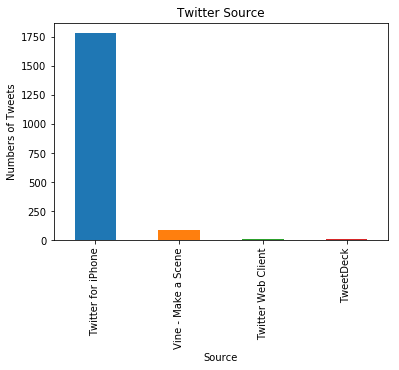

In [58]:
source = twitter_archive_master.source.value_counts()
source_plot = source.plot.bar()
plt.title('Twitter Source')
plt.xlabel('Source')
plt.ylabel('Numbers of Tweets');


2. Most popular dog name

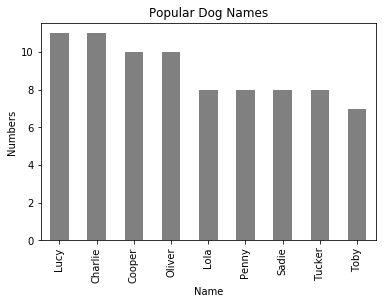

In [59]:
name = twitter_archive_master.name.value_counts()[1:10]
name_plot = name.plot.bar(color='grey')
plt.title('Popular Dog Names')
plt.xlabel('Name')
plt.ylabel('Numbers');


3. Correlation between Favorite and Retweet

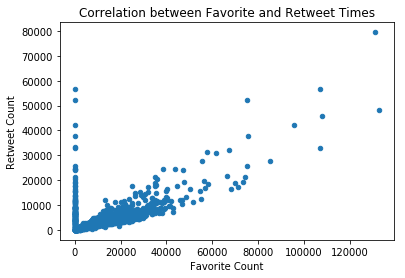

In [60]:
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Correlation between Favorite and Retweet Times');
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');